In [51]:
import easyocr

In [52]:
ocrReader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [53]:
image_path = '../data/images/resultSegment.png'
ocrReadResult = ocrReader.readtext(image_path)

c:\Users\ammar.jamalludin\Documents\Grocea\grocea-ml\.venv\Lib\site-packages\torch\utils\data\dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  super().__init__(loader)


In [46]:
print(ocrReadResult)

[([[np.int32(219), np.int32(71)], [np.int32(477), np.int32(71)], [np.int32(477), np.int32(115)], [np.int32(219), np.int32(115)]], '0 survey_-Walmart:cor_', np.float64(0.3413992813798623)), ([[np.int32(10), np.int32(98)], [np.int32(108), np.int32(98)], [np.int32(108), np.int32(126)], [np.int32(10), np.int32(126)]], 'Give us', np.float64(0.9950609778346456)), ([[np.int32(107), np.int32(83)], [np.int32(355), np.int32(83)], [np.int32(355), np.int32(145)], [np.int32(107), np.int32(145)]], 'steezback7PB643CYz2', np.float64(0.08015318947234552)), ([[0, np.int32(115)], [np.int32(207), np.int32(115)], [np.int32(207), np.int32(159)], [0, np.int32(159)]], '2 Thank ,oul ID #=', np.float64(0.16582427984685696)), ([[np.int32(140), np.int32(133)], [np.int32(325), np.int32(133)], [np.int32(325), np.int32(199)], [np.int32(140), np.int32(199)]], 'Walmart ', np.float64(0.32163395128664)), ([[np.int32(100), np.int32(181)], [np.int32(408), np.int32(181)], [np.int32(408), np.int32(234)], [np.int32(100), np.

In [54]:
import os
import pandas as pd

rows = []
for item in ocrReadResult:
    bbox = item[0]  # list of 4 points
    text = item[1]
    conf = item[2] if len(item) > 2 else None
    # flatten bbox to x1,y1,...,x4,y4 and also keep a string representation
    coords = [int(c) for p in bbox for c in p]
    rows.append({
        "x1": coords[0], "y1": coords[1],
        "x2": coords[2], "y2": coords[3],
        "x3": coords[4], "y3": coords[5],
        "x4": coords[6], "y4": coords[7],
        "bbox": str([[int(p[0]), int(p[1])] for p in bbox]),
        "text": text,
        "confidence": float(conf) if conf is not None else None
    })

df = pd.DataFrame(rows)
output_path = '../data/outputs/ocr_results.csv'
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_csv(output_path, index=False, encoding='utf-8-sig')

# show table in notebook
df

,x1,y1,x2,y2,x3,y3,x4,y4,bbox,text,confidence
0,219,71,477,71,477,115,219,115,"[[219, 71], [477, 71], [477, 115], [219, 115]]",0 survey_-Walmart:cor_,0.341399
1,10,98,108,98,108,126,10,126,"[[10, 98], [108, 98], [108, 126], [10, 126]]",Give us,0.995061
2,107,83,355,83,355,145,107,145,"[[107, 83], [355, 83], [355, 145], [107, 145]]",steezback7PB643CYz2,0.080153
3,0,115,207,115,207,159,0,159,"[[0, 115], [207, 115], [207, 159], [0, 159]]","2 Thank ,oul ID #=",0.165824
4,140,133,325,133,325,199,140,199,"[[140, 133], [325, 133], [325, 199], [140, 199]]",Walmart,0.321634
...,...,...,...,...,...,...,...,...,...,...,...
57,375,1083,495,1083,495,1119,375,1119,"[[375, 1083], [495, 1083], [495, 1119], [375, ...",Every Day_,0.486098
58,65,1109,115,1109,115,1145,65,1145,"[[65, 1109], [115, 1109], [115, 1145], [65, 11...",Low,0.858542
59,157,1121,259,1121,259,1149,157,1149,"[[157, 1121], [259, 1121], [259, 1149], [157, ...",10/18/20,0.704701
60,310,1110,415,1110,415,1143,310,1143,"[[310, 1110], [415, 1110], [415, 1143], [310, ...",11;30.46,0.546762


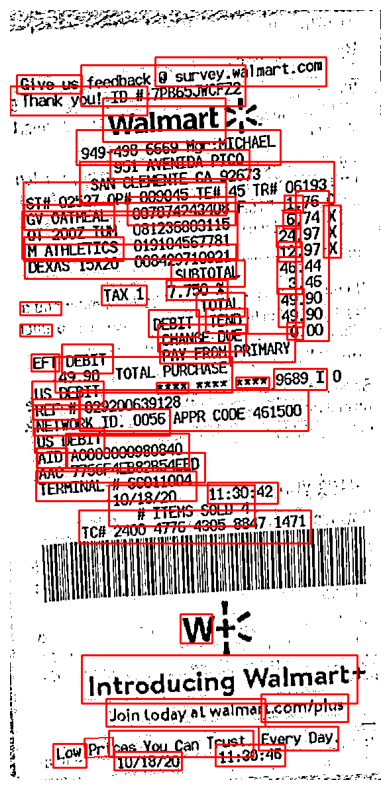

Saved visualization to ../outputs/ocr_bboxes.jpg


In [56]:
# Draw OCR bounding boxes on the image and display/save the result
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

if not os.path.exists(image_path):
    print(f"Image not found: {image_path}")
else:
    img = Image.open(image_path).convert('RGB')
    draw = ImageDraw.Draw(img)

    for item in ocrReadResult:
        bbox = item[0]
        # convert bbox points to integer tuples
        poly = [(int(p[0]), int(p[1])) for p in bbox]
        # draw polygon (closed) as box outline — no text labels
        draw.line(poly + [poly[0]], width=3, fill='red')

    plt.figure(figsize=(10,10))
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.show()

    out = '../outputs/ocr_bboxes.jpg'
    os.makedirs(os.path.dirname(out), exist_ok=True)
    img.save(out)
    print(f"Saved visualization to {out}")

In [57]:
import re
import os
import pandas as pd

# Build readable text by grouping OCR boxes into lines (sort by vertical then horizontal position)
entries = []
for item in ocrReadResult:
    bbox = item[0]
    text = item[1].strip()
    # center y and leftmost x for sorting/grouping
    y_center = sum([p[1] for p in bbox]) / 4.0
    x_min = min(p[0] for p in bbox)
    entries.append({"y": y_center, "x": x_min, "text": text})

entries_sorted = sorted(entries, key=lambda e: (e['y'], e['x']))

# Group into lines using a small vertical threshold
lines = []
if entries_sorted:
    current_line = [entries_sorted[0]['text']]
    current_y = entries_sorted[0]['y']
    for e in entries_sorted[1:]:
        if abs(e['y'] - current_y) <= 10:  # same line threshold (pixels)
            current_line.append(e['text'])
            current_y = (current_y + e['y']) / 2.0
        else:
            lines.append(' '.join(current_line))
            current_line = [e['text']]
            current_y = e['y']
    lines.append(' '.join(current_line))

ocr_text = '\n'.join(lines)

print('---- OCR text (grouped lines) ----')
print(ocr_text)

# Regex extraction
# dates (dd/mm/yyyy, dd-mm-yyyy, yyyy-mm-dd, etc.)
date_pattern = r"\b(?:\d{1,2}[/-]\d{1,2}[/-]\d{2,4}|\d{4}[/-]\d{1,2}[/-]\d{1,2})\b"
dates = re.findall(date_pattern, ocr_text)

# monetary amounts (e.g., 12.34, 1,234.56)
amount_pattern = r"\b\$?\d{1,3}(?:,\d{3})*(?:\.\d{2})\b"
amounts = re.findall(amount_pattern, ocr_text)

# Look for amounts on lines that mention total/amount/subtotal/etc.
total_keywords = re.compile(r"total|amount|subtotal|grand|balance", re.I)
totals_in_lines = []
for line in lines:
    if total_keywords.search(line):
        found = re.findall(amount_pattern, line)
        if found:
            totals_in_lines.extend(found)

# Fallback: if no explicit 'total' mention, choose the largest amount as probable total
probable_total = None
if totals_in_lines:
    probable_total = totals_in_lines[0]
elif amounts:
    try:
        nums = [float(a.replace('$','').replace(',','')) for a in amounts]
        probable_total = '{:.2f}'.format(max(nums))
    except Exception:
        probable_total = None

print('\nDates found:', dates)
print('Amounts found:', amounts)
print('Totals found in lines:', totals_in_lines)
print('Probable total:', probable_total)

# Save outputs
os.makedirs('../data/outputs', exist_ok=True)
with open('../data/outputs/ocr_text.txt', 'w', encoding='utf-8') as f:
    f.write(ocr_text)

df_extracted = pd.DataFrame({
    'dates': [', '.join(dates) if dates else None],
    'amounts': [', '.join(amounts) if amounts else None],
    'probable_total': [probable_total]
})

df_extracted.to_csv('../data/outputs/ocr_extracted.csv', index=False, encoding='utf-8-sig')

df_extracted

---- OCR text (grouped lines) ----
0 survey_-Walmart:cor_
Give us steezback7PB643CYz2
2 Thank ,oul ID #=
Walmart
949-498-6669_NoBHICHAEL
951_AVENIDA PICO
Smicie,904 6e/3257784' 06193:
ST# 02521 OPi 009oa5 TEOE 1.
'007874743408;: GV  OATHEAL 6)
 QARLEics  8391053008 24
M ATHLETICS 12
CEx4s-15*20   008429710978 1
SuBtoTaL 46
7.750 % TAX 1
TotAL 49: {U^
Te@ DEBIT
IJi 0_
Chance; 0u
PRIHARY PAY FROH
DEBIT': EFT
49.90' ToTAL; PURCiMASE 9589,I IIrX
TXTX US DEBIT
REF: # 7029200609828PPR CODE 461500,
NETHCRK Id. .0056
US DEBIT
8oo00000980840
AID "
AAC TSGF4EBB2BEAGE0
TERMINAL #SC011004
11.30:42
"107187745 S0kn80
ICh 2400.477E,4305,e47i971
W
Introducing Walmart-
Lcom/plus Join loday Al walmar_
Every Day_ cos You Can Tryst Pri
11;30.46 Low 10/18/20

Dates found: ['10/18/20']
Amounts found: ['49.90', '11.30', '30.46']
Totals found in lines: ['49.90']
Probable total: 49.90


,dates,amounts,probable_total
0,10/18/20,"49.90, 11.30, 30.46",49.90
